In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# ver columnas y filas completas
pd.set_option('display.max_columns', None)

In [3]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\s+', ' ', text)  # Reemplazar múltiples espacios con uno solo
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # Eliminar caracteres especiales
    text = text.strip()  # Eliminar espacios al inicio y final
    return text

def format_text_columns(df, columns):
    for col in columns:
        df[col] = df[col].astype(str).apply(clean_text)
    return df

In [57]:
# Cargar el archivo CSV
file_path = '../data/processed/df_final_correcto_processed.csv'
df = pd.read_csv(file_path)

In [62]:
df = df.drop(columns=['translated_lyrics', 'track_uri', 'views', 'lyrics'])

In [63]:
columns_to_format = ['song_name', 'artist_name', 'album_name', 'playlists_names', 'combined_genres', 'processed_lyrics']
df = format_text_columns(df, columns_to_format)

In [64]:
df.head(5)

,artist_name,song_name,recording_id,danceable,not_danceable,male,female,timbre_bright,timbre_dark,tonal,atonal,instrumental,voice,dortmund_alternative,dortmund_blues,dortmund_electronic,dortmund_folkcountry,dortmund_funksoulrnb,dortmund_jazz,dortmund_pop,dortmund_raphiphop,dortmund_rock,electronic_ambient,electronic_dnb,electronic_house,electronic_techno,electronic_trance,rosamerica_cla,rosamerica_dan,rosamerica_hip,rosamerica_jaz,rosamerica_pop,rosamerica_rhy,rosamerica_roc,rosamerica_spe,tzanetakis_blu,tzanetakis_cla,tzanetakis_cou,tzanetakis_dis,tzanetakis_hip,tzanetakis_jaz,tzanetakis_met,tzanetakis_pop,tzanetakis_reg,tzanetakis_roc,ismir04_rhythm_ChaChaCha,ismir04_rhythm_Jive,ismir04_rhythm_Quickstep,ismir04_rhythm_Rumba-American,ismir04_rhythm_Rumba-International,ismir04_rhythm_Rumba-Misc,ismir04_rhythm_Samba,ismir04_rhythm_Tango,ismir04_rhythm_VienneseWaltz,ismir04_rhythm_Waltz,mood_acoustic,mood_not_acoustic,mood_aggressive,mood_not_aggressive,mood_electronic,mood_not_electronic,mood_happy,mood_not_happy,mood_party,mood_not_party,mood_relaxed,mood_not_relaxed,mood_sad,mood_not_sad,mood_mirex1,mood_mirex2,mood_mirex3,mood_mirex4,mood_mirex5,spotify_url,album_name,album_release_date,duration_ms,popularity,language,playlist_ids,positions,playlists_names,combined_genres,processed_lyrics
0,anthony hamilton,change your world,00012f9d-8397-4a51-8fd5-027d3b5ccd62,0.811,0.189,0.352,0.648,0.921,0.079,0.249,0.751,0.107,0.893,0.002,0.000,0.997,0.001,0.000,0.000,0.000,0.000,0.000,0.419,0.012,0.327,0.031,0.211,0.009,0.033,0.024,0.088,0.387,0.411,0.040,0.007,0.063,0.035,0.078,0.105,0.157,0.314,0.045,0.063,0.063,0.078,0.074,0.039,0.008,0.017,0.022,0.021,0.023,0.449,0.341,0.006,0.580,0.420,0.025,0.975,0.349,0.651,0.372,0.628,0.383,0.617,0.911,0.089,0.361,0.639,0.110,0.226,0.193,0.128,0.343,https://open.spotify.com/track/6qiH0OG98zIT8TX...,aint nobody worryin,2005-12-13,280973.0,26.0,en,NaN,NaN,nan,urban ac soul rnb neosoul urban neo soul soul ...,id be in the hall of fame the mere mentioning ...
1,adriano celentano,rock matto,00018b1c-1992-4dd1-bca0-e8cd8fa30b12,0.506,0.494,0.906,0.094,0.980,0.020,0.213,0.787,0.060,0.940,0.065,0.504,0.019,0.114,0.021,0.143,0.021,0.003,0.113,0.455,0.396,0.107,0.020,0.022,0.440,0.004,0.013,0.086,0.026,0.374,0.052,0.004,0.063,0.035,0.104,0.078,0.157,0.314,0.045,0.063,0.063,0.078,0.720,0.032,0.011,0.012,0.004,0.002,0.007,0.078,0.129,0.004,0.276,0.724,0.066,0.934,0.053,0.947,0.875,0.125,0.238,0.762,0.297,0.703,0.177,0.823,0.052,0.472,0.062,0.209,0.205,https://open.spotify.com/track/1f4XnAcZiAgIyCg...,il meglio di adriano celentano,1960-01-01,111647.0,6.0,it,NaN,NaN,nan,pop italian pop rock italian pop italiano,bisexized bisexted distracted by you this very...
2,jedi mind tricks,poison in the birth water,0002d0cb-4fdd-4726-a9a1-15e6327ad216,1.000,0.000,0.055,0.945,0.218,0.782,0.112,0.888,0.899,0.101,0.012,0.007,0.939,0.003,0.004,0.011,0.001,0.017,0.007,0.078,0.133,0.266,0.113,0.411,0.002,0.150,0.744,0.003,0.018,0.018,0.064,0.002,0.087,0.039,0.087,0.058,0.174,0.174,0.050,0.087,0.070,0.174,0.985,0.001,0.001,0.001,0.001,0.000,0.002,0.001,0.007,0.000,0.000,1.000,0.008,0.992,0.907,0.093,0.331,0.669,0.371,0.629,0.755,0.245,0.117,0.883,0.159,0.161,0.057,0.052,0.571,https://open.spotify.com/track/1ZU14gwD0acOt89...,the thief and the fallen,2015-06-02,175252.0,25.0,en,"[100309, 11213, 121167, 121483, 122735, 129910...","[3, 87, 74, 127, 38, 16, 50, 70, 142, 24, 133,...",alt country road trip friendsgiving new music ...,hiphop underground hiphop rap hip hop undergro...,theres a voice that i can hear sometimes out h...
3,buckshot,we in here,0003b256-2092-46d2-a332-b84053eafcb5,1.000,0.000,0.622,0.378,0.003,0.997,0.046,0.954,0.000,1.000,0.003,0.002,0.971,0.001,0.002,0.014,0.001,0.001,0.004,0.374,0.044,0.278,0.103,0.201,0.024,0.074,0.526,0.036,0.111,0.103,0.080,0.046,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.864,0.003,0.002,0.012,0.089,0.004,0.022,0.002,0.001,0.000,0.096,0.904,1.000,0.000,0.979,0.021,

In [65]:
# Nulos
pd.set_option('display.max_rows', None) 
df.isnull().sum()

artist_name                               0
song_name                                 0
recording_id                              0
danceable                                 0
not_danceable                             0
male                                      0
female                                    0
timbre_bright                             0
timbre_dark                               0
tonal                                     0
atonal                                    0
instrumental                              0
voice                                     0
dortmund_alternative                      0
dortmund_blues                            0
dortmund_electronic                       0
dortmund_folkcountry                      0
dortmund_funksoulrnb                      0
dortmund_jazz                             0
dortmund_pop                              0
dortmund_raphiphop                        0
dortmund_rock                             0
electronic_ambient              

In [68]:
pd.set_option('display.max_rows', 10) 

In [66]:
df.to_csv('for_eda.csv', index=False)

In [67]:
# Descripción estadística de las columnas numéricas
df.describe()

,danceable,not_danceable,male,female,timbre_bright,timbre_dark,tonal,atonal,instrumental,voice,dortmund_alternative,dortmund_blues,dortmund_electronic,dortmund_folkcountry,dortmund_funksoulrnb,dortmund_jazz,dortmund_pop,dortmund_raphiphop,dortmund_rock,electronic_ambient,electronic_dnb,electronic_house,electronic_techno,electronic_trance,rosamerica_cla,rosamerica_dan,rosamerica_hip,rosamerica_jaz,rosamerica_pop,rosamerica_rhy,rosamerica_roc,rosamerica_spe,tzanetakis_blu,tzanetakis_cla,tzanetakis_cou,tzanetakis_dis,tzanetakis_hip,tzanetakis_jaz,tzanetakis_met,tzanetakis_pop,tzanetakis_reg,tzanetakis_roc,ismir04_rhythm_ChaChaCha,ismir04_rhythm_Jive,ismir04_rhythm_Quickstep,ismir04_rhythm_Rumba-American,ismir04_rhythm_Rumba-International,ismir04_rhythm_Rumba-Misc,ismir04_rhythm_Samba,ismir04_rhythm_Tango,ismir04_rhythm_VienneseWaltz,ismir04_rhythm_Waltz,mood_acoustic,mood_not_acoustic,mood_aggressive,mood_not_aggressive,mood_electronic,mood_not_electronic,mood_happy,mood_not_happy,mood_party,mood_not_party,mood_relaxed,mood_not_relaxed,mood_sad,mood_not_sad,mood_mirex1,mood_mirex2,mood_mirex3,mood_mirex4,mood_mirex5,duration_ms,popularity
count,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,157811.000000,1.533600e+05,157613.000000
mean,0.550749,0.449251,0.502238,0.497762,0.511713,0.488287,0.436403,0.563597,0.538722,0.461278,0.059226,0.030057,0.782022,0.057377,0.003517,0.013896,0.007959,0.009440,0.036341,0.458049,0.036371,0.174876,0.026511,0.304195,0.051457,0.087392,0.124221,0.061171,0.214272,0.206605,0.242775,0.012068,0.059957,0.035738,0.091579,0.068301,0.144027,0.327244,0.046047,0.065860,0.061354,0.099659,0.325951,0.072006,0.016922,0.047767,0.042083,0.020482,0.051001,0.178119,0.226055,0.019591,0.289444,0.710556,0.234108,0.765892,0.553105,0.446895,0.361823,0.638177,0.387568,0.612432,0.564430,0.435570,0.364395,0.635605,0.111134,0.176451,0.234523,0.150553,0.327341,2.344028e+05,21.589679
std,0.399555,0.399555,0.337467,0.337467,0.386967,0.386967,0.368789,0.368789,0.388659,0.388659,0.081877,0.064331,0.289820,0.114110,0.006954,0.036726,0.015013,0.051654,0.077157,0.265838,0.050511,0.163926,0.035052,0.262753,0.131477,0.163581,0.222322,0.121096,0.210698,0.222175,0.330397,0.028852,0.022869,0.027370,0.027007,0.022337,0.048969,0.149633,0.023397,0.029692,0.020265,0.073143,0.324732,0.083100,0.031980,0.112154,0.069775,0.024118,0.049803,0.211252,0.252814,0.046436,0.339581,0.339581,0.327086,0.327086,0.317336,0.317336,0.268147,0.268147,0.320204,0.320204,0.337164,0.337164,0.245083,0.245083,0.053798,0.123436,0.143526,0.086839,0.227877,1.157292e+05,15.790301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [69]:
# Nulos
pd.set_option('display.max_rows', None) 
df.isnull().sum()

artist_name                               0
song_name                                 0
recording_id                              0
danceable                                 0
not_danceable                             0
male                                      0
female                                    0
timbre_bright                             0
timbre_dark                               0
tonal                                     0
atonal                                    0
instrumental                              0
voice                                     0
dortmund_alternative                      0
dortmund_blues                            0
dortmund_electronic                       0
dortmund_folkcountry                      0
dortmund_funksoulrnb                      0
dortmund_jazz                             0
dortmund_pop                              0
dortmund_raphiphop                        0
dortmund_rock                             0
electronic_ambient              

In [70]:
pd.set_option('display.max_rows', 10) 

In [71]:
# Filtrar filas donde spotify_url es nulo y guardarlas en B
b = df[df['spotify_url'].isnull()]

# Eliminar esas filas de A
df = df.dropna(subset=['spotify_url'])

# Guardar los datasets actualizados
b.to_csv("dataset_b_nulos.csv", index=False)
df.to_csv("dataset_a_sin_nulos.csv", index=False)


In [72]:
# Nulos
pd.set_option('display.max_rows', None) 
df.isnull().sum()

artist_name                               0
song_name                                 0
recording_id                              0
danceable                                 0
not_danceable                             0
male                                      0
female                                    0
timbre_bright                             0
timbre_dark                               0
tonal                                     0
atonal                                    0
instrumental                              0
voice                                     0
dortmund_alternative                      0
dortmund_blues                            0
dortmund_electronic                       0
dortmund_folkcountry                      0
dortmund_funksoulrnb                      0
dortmund_jazz                             0
dortmund_pop                              0
dortmund_raphiphop                        0
dortmund_rock                             0
electronic_ambient              

In [73]:
# Nulos
pd.set_option('display.max_rows', None) 
b.isnull().sum()

artist_name                             0
song_name                               0
recording_id                            0
danceable                               0
not_danceable                           0
male                                    0
female                                  0
timbre_bright                           0
timbre_dark                             0
tonal                                   0
atonal                                  0
instrumental                            0
voice                                   0
dortmund_alternative                    0
dortmund_blues                          0
dortmund_electronic                     0
dortmund_folkcountry                    0
dortmund_funksoulrnb                    0
dortmund_jazz                           0
dortmund_pop                            0
dortmund_raphiphop                      0
dortmund_rock                           0
electronic_ambient                      0
electronic_dnb                    

count    1.533600e+05
mean     2.344028e+05
std      1.157292e+05
min      4.000000e+03
25%      1.908660e+05
50%      2.228660e+05
75%      2.609060e+05
max      9.744610e+06
Name: duration_ms, dtype: float64


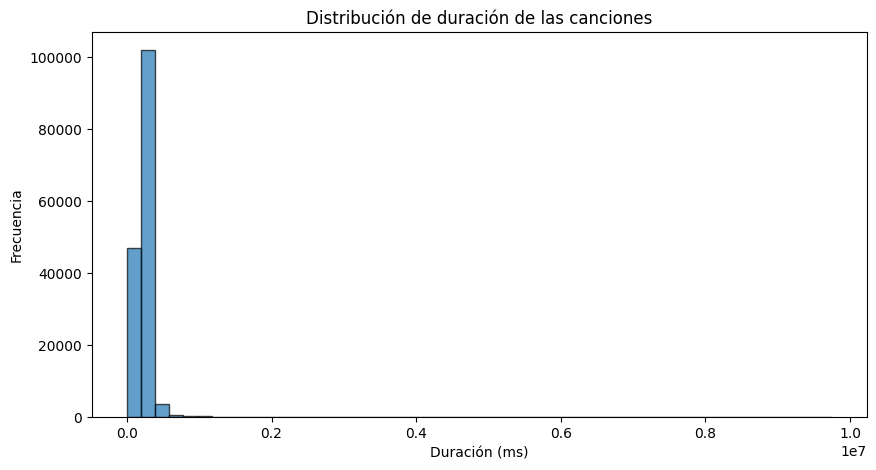

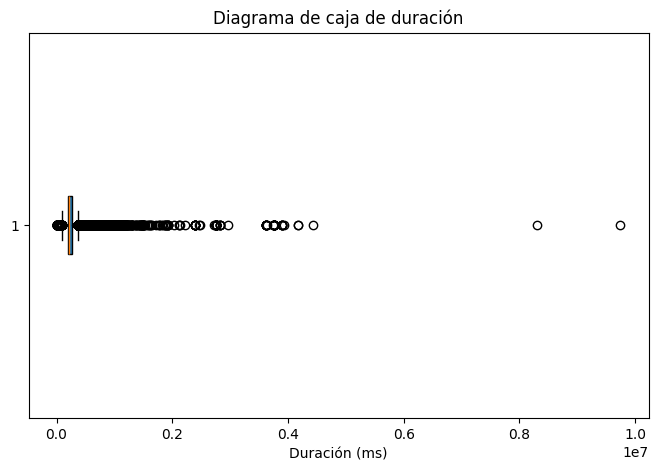

In [39]:
# Ver estadísticas generales
duration_stats = df['duration_ms'].describe()
print(duration_stats)

# Histograma para ver la distribución
plt.figure(figsize=(10, 5))
plt.hist(df['duration_ms'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Duración (ms)')
plt.ylabel('Frecuencia')
plt.title('Distribución de duración de las canciones')
plt.show()

# Boxplot para detectar outliers
plt.figure(figsize=(8, 5))
plt.boxplot(df['duration_ms'].dropna(), vert=False, patch_artist=True)
plt.xlabel('Duración (ms)')
plt.title('Diagrama de caja de duración')
plt.show()


In [77]:
# Nulos
pd.set_option('display.max_rows', None) 
df.isnull().sum()

artist_name                               0
song_name                                 0
recording_id                              0
danceable                                 0
not_danceable                             0
male                                      0
female                                    0
timbre_bright                             0
timbre_dark                               0
tonal                                     0
atonal                                    0
instrumental                              0
voice                                     0
dortmund_alternative                      0
dortmund_blues                            0
dortmund_electronic                       0
dortmund_folkcountry                      0
dortmund_funksoulrnb                      0
dortmund_jazz                             0
dortmund_pop                              0
dortmund_raphiphop                        0
dortmund_rock                             0
electronic_ambient              

In [78]:
# Calcular la mediana de "duration_ms"
median_duration = df['duration_ms'].median()

# Rellenar los valores nulos con la mediana
df['duration_ms'].fillna(median_duration, inplace=True)

# Verificar que ya no haya valores nulos en "duration_ms"
df['duration_ms'].isnull().sum()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15776\3814559637.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration_ms'].fillna(median_duration, inplace=True)


0

In [80]:
# Nulos
pd.set_option('display.max_rows', None) 
df.isnull().sum()

artist_name                               0
song_name                                 0
recording_id                              0
danceable                                 0
not_danceable                             0
male                                      0
female                                    0
timbre_bright                             0
timbre_dark                               0
tonal                                     0
atonal                                    0
instrumental                              0
voice                                     0
dortmund_alternative                      0
dortmund_blues                            0
dortmund_electronic                       0
dortmund_folkcountry                      0
dortmund_funksoulrnb                      0
dortmund_jazz                             0
dortmund_pop                              0
dortmund_raphiphop                        0
dortmund_rock                             0
electronic_ambient              

In [82]:
df = df.drop(columns=['positions'], axis=1)
df.isnull().sum()

artist_name                               0
song_name                                 0
recording_id                              0
danceable                                 0
not_danceable                             0
male                                      0
female                                    0
timbre_bright                             0
timbre_dark                               0
tonal                                     0
atonal                                    0
instrumental                              0
voice                                     0
dortmund_alternative                      0
dortmund_blues                            0
dortmund_electronic                       0
dortmund_folkcountry                      0
dortmund_funksoulrnb                      0
dortmund_jazz                             0
dortmund_pop                              0
dortmund_raphiphop                        0
dortmund_rock                             0
electronic_ambient              

In [83]:
df['language'] = df['language'].fillna('unknown')
df.isnull().sum()

artist_name                               0
song_name                                 0
recording_id                              0
danceable                                 0
not_danceable                             0
male                                      0
female                                    0
timbre_bright                             0
timbre_dark                               0
tonal                                     0
atonal                                    0
instrumental                              0
voice                                     0
dortmund_alternative                      0
dortmund_blues                            0
dortmund_electronic                       0
dortmund_folkcountry                      0
dortmund_funksoulrnb                      0
dortmund_jazz                             0
dortmund_pop                              0
dortmund_raphiphop                        0
dortmund_rock                             0
electronic_ambient              

In [84]:
df['playlists_names'].fillna("no playlist", inplace=True)
df['playlist_ids'].fillna(0, inplace=True)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15776\1247433486.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['playlists_names'].fillna("no playlist", inplace=True)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15776\1247433486.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [85]:
df.isnull().sum()

artist_name                           0
song_name                             0
recording_id                          0
danceable                             0
not_danceable                         0
male                                  0
female                                0
timbre_bright                         0
timbre_dark                           0
tonal                                 0
atonal                                0
instrumental                          0
voice                                 0
dortmund_alternative                  0
dortmund_blues                        0
dortmund_electronic                   0
dortmund_folkcountry                  0
dortmund_funksoulrnb                  0
dortmund_jazz                         0
dortmund_pop                          0
dortmund_raphiphop                    0
dortmund_rock                         0
electronic_ambient                    0
electronic_dnb                        0
electronic_house                      0


In [87]:
df.to_csv('clean_df.csv', index=False)